<a href="https://colab.research.google.com/github/Karasiari/Graphs/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D1%83%D0%B5%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install igraph powerlaw

Calculating best minimal value for power law fit


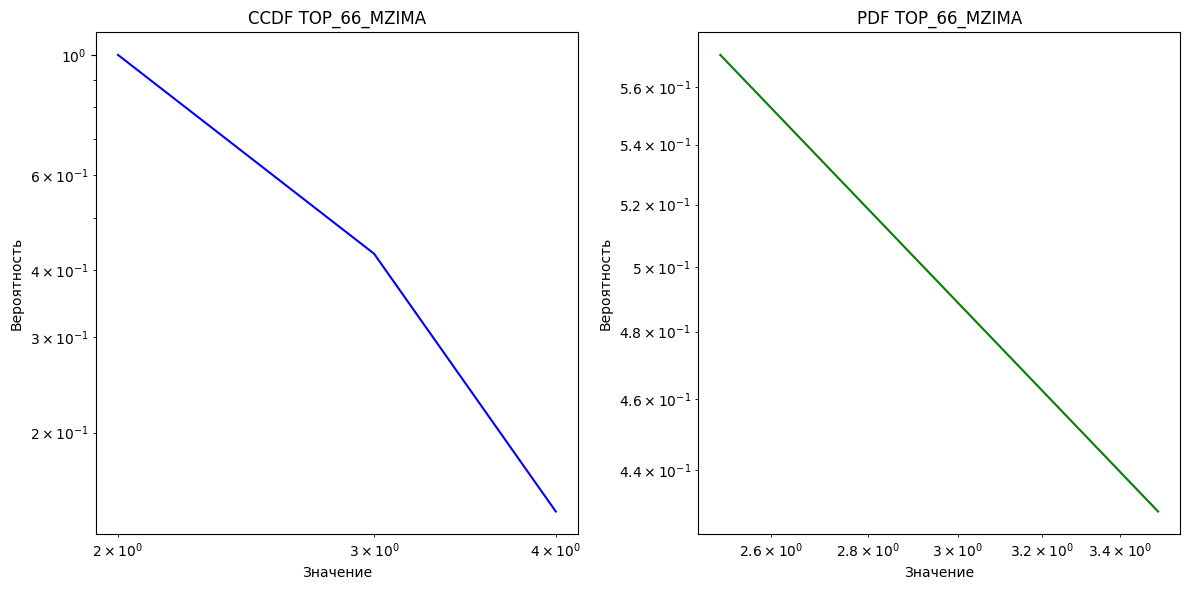

Calculating best minimal value for power law fit


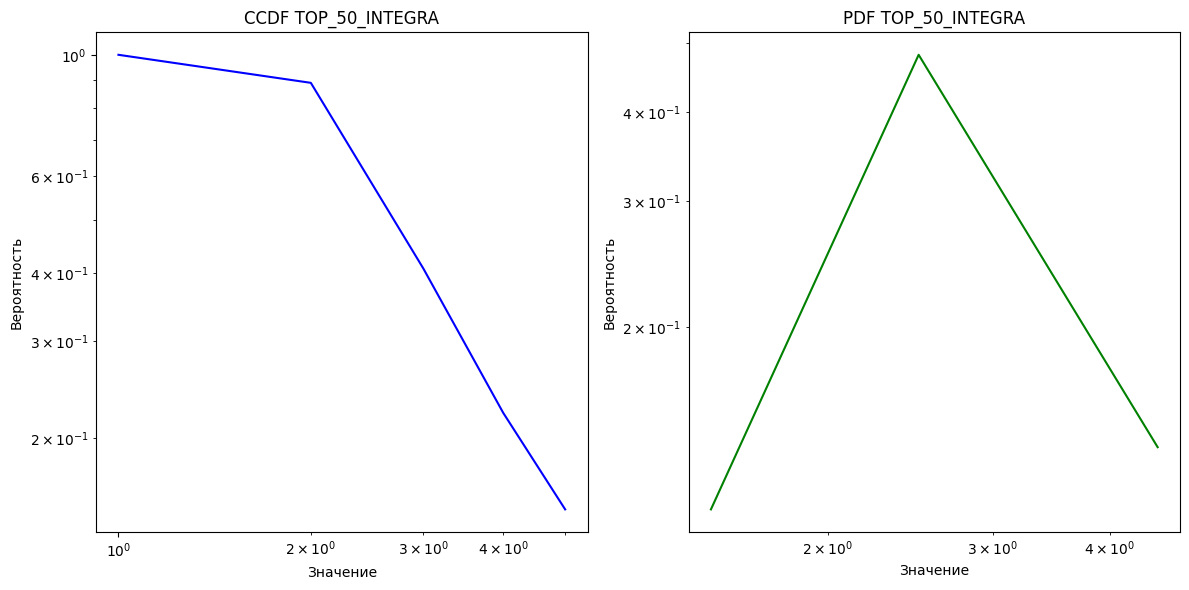

Calculating best minimal value for power law fit


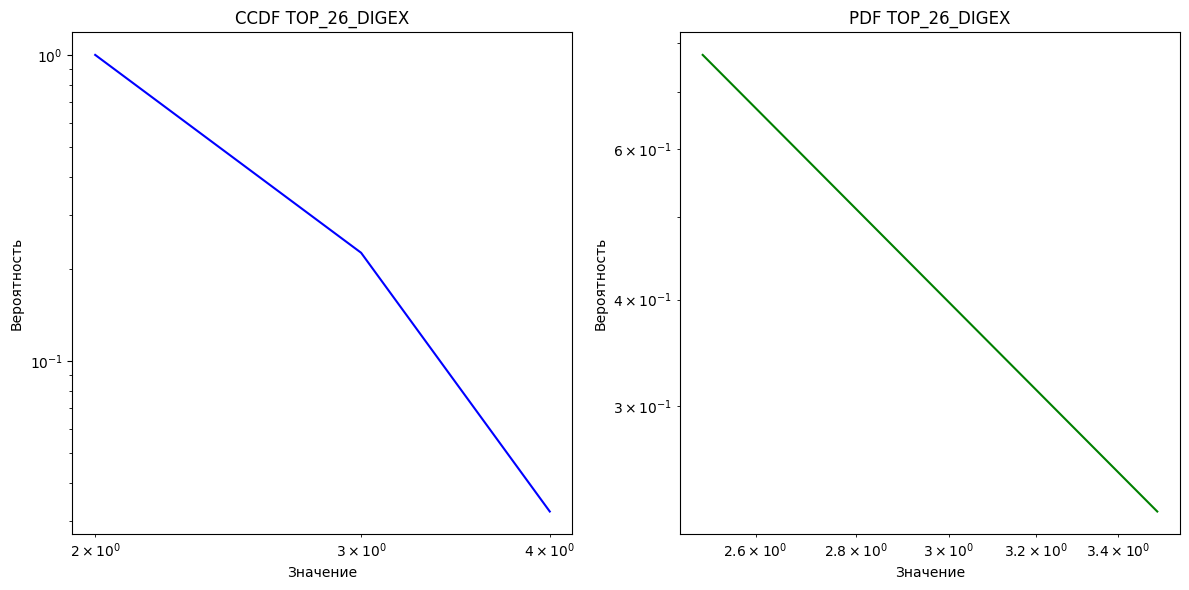

Calculating best minimal value for power law fit


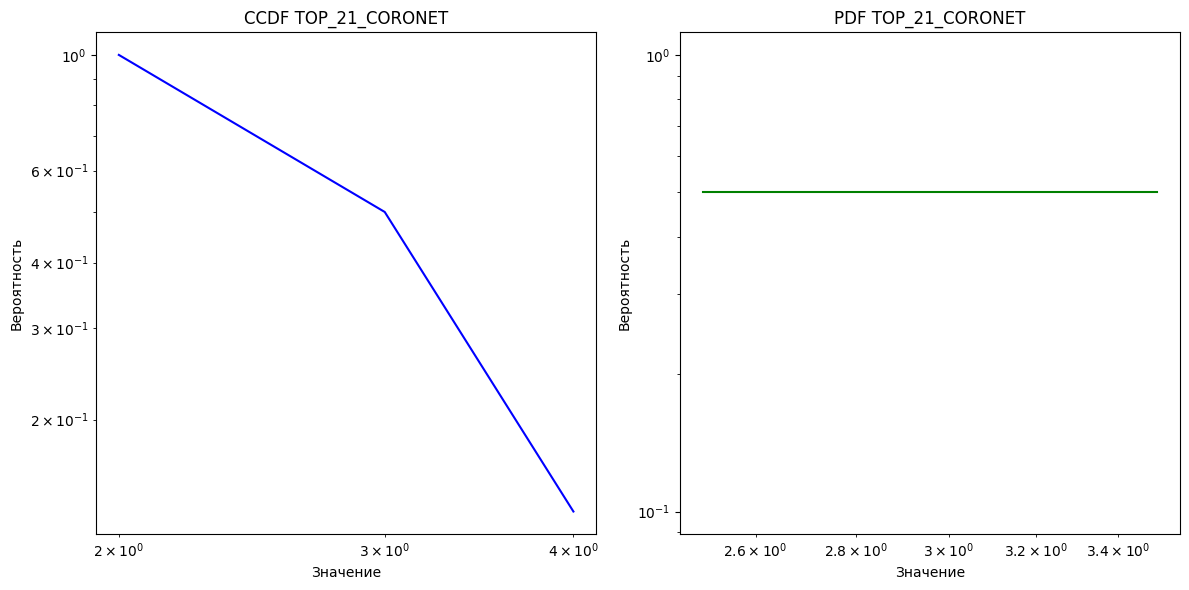

Calculating best minimal value for power law fit


Less than 2 unique data values left after xmin and xmax options! Cannot fit. Returning nans.
/usr/local/lib/python3.11/dist-packages/powerlaw.py:1170: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 + len(data)/sum(log(data / (self.xmin)))
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:850: RuntimeWarning: invalid value encountered in subtract
  if (np.max(np.ravel(np.abs(sim[1:] - sim[0]))) <= xatol and
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:855: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:905: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])


IndexError: index -1 is out of bounds for axis 0 with size 0

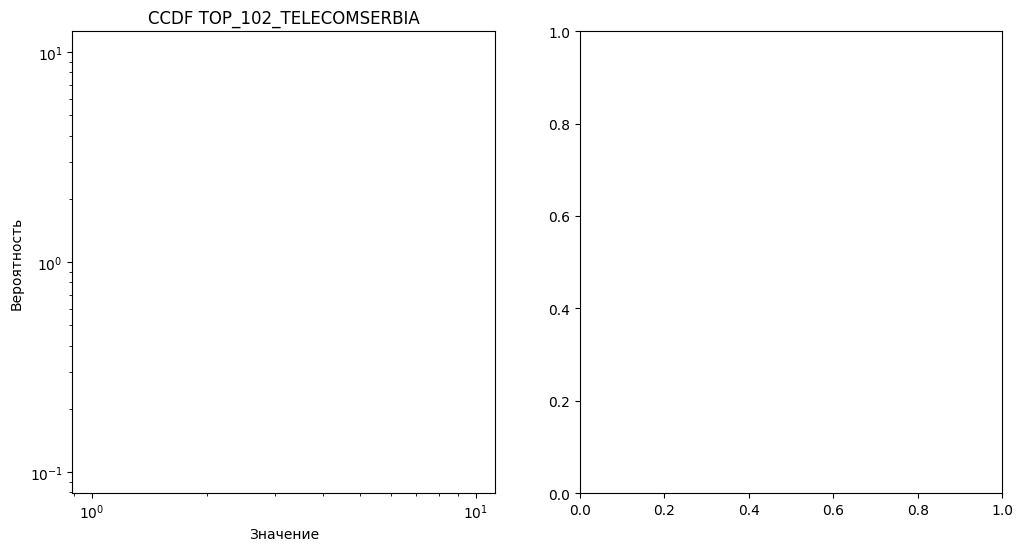

In [43]:
import igraph as ig
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw

from igraph import *

def excel_to_graph(path):
  df = pd.read_excel(path, sheet_name = 1)

  max_vertex = max(df['Source'].max(), df['Destination'].max())

  adjacency_matrix = np.zeros((max_vertex, max_vertex))

  for index, row in df.iterrows():
    start_vertex = int(row['Source']) - 1
    end_vertex = int(row['Destination']) - 1
    weight = row['Computed Length (km)']
    adjacency_matrix[start_vertex][end_vertex] = weight
    adjacency_matrix[end_vertex][start_vertex] = weight

  return adjacency_matrix

def law_distributions_graphics(graph, file = None):

  degrees = list(graph.degree())
  unique_degrees, counts = np.unique(degrees, return_counts=True)

  plt.figure(figsize=(10, 6))
  sns.lineplot(x=unique_degrees, y=counts, marker='o', label='Распределение степеней')
  plt.xscale('log')
  plt.yscale('log')
  title = "Логарифмический график распределения степеней вершин " + file[:-5]
  plt.title(title)
  plt.xlabel("Степень вершины")
  plt.ylabel("Количество вершин")
  plt.legend()
  plt.show()

def law_distributions(graph, file = None):

  degrees = list(graph.degree())

  fit = powerlaw.Fit(degrees, discrete=True, estimate_discrete=False) # лучший xmin по MLE
  fit_fixed_tail = powerlaw.Fit(degrees, xmin=2.0, discrete=True, estimate_discrete=False) #выкидываем только листы

  fig, (CCDF, PDF) = plt.subplots(1, 2, figsize=(12, 6))
  title = file[:-5]

  powerlaw.plot_ccdf(degrees, ax = CCDF, color='b')
  CCDF.set_title("CCDF " + title)
  CCDF.set_xlabel("Значение")
  CCDF.set_ylabel("Вероятность")

  powerlaw.plot_pdf(degrees, linear_bins=False, ax = PDF, color='g')
  PDF.set_title("PDF " + title)
  PDF.set_xlabel("Значение")
  PDF.set_ylabel("Вероятность")

  plt.tight_layout()
  plt.show()

def folder_to_graphics_simple(path_to_folder):
  files = os.listdir(path_to_folder)
  Output = []
  excel_tables = []
  for file in files:
    if file.endswith('.xlsx'):
      excel_file_path = os.path.join(path_to_folder, file)
      excel_tables.append(file[:-5])

      adjacency_matrix = excel_to_graph(excel_file_path)
      graph = ig.Graph.Weighted_Adjacency(adjacency_matrix, mode = 'undirected')
      law_distributions_graphics(graph, file)

def folder_to_distributions(path_to_folder):
  files = os.listdir(path_to_folder)
  Output = []
  excel_tables = []
  for file in files:
    if file.endswith('.xlsx'):
      excel_file_path = os.path.join(path_to_folder, file)
      excel_tables.append(file[:-5])

      adjacency_matrix = excel_to_graph(excel_file_path)
      graph = ig.Graph.Weighted_Adjacency(adjacency_matrix, mode = 'undirected')
      law_distributions(graph, file)

path_to_folder = '/content/Тест'
folder_to_distributions(path_to_folder)
#input = input('Запрос: ')
#if input == 'log':
  #folder_to_graphics_simple(path_to_folder)
#elif input == 'pw':
 # folder_to_distributions(path_to_folder)